In [26]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import scipy
from PIL import Image
from matplotlib.pyplot import imshow

In [8]:
#metric for measuring quality performance (ignore for testing on a single image)
def srcc(y_true, y_pred):
     return ( tf.py_function(spearmanr, [tf.cast(y_pred, tf.float32),
                       tf.cast(y_true, tf.float32)], Tout = tf.float32) )

In [9]:
#preprocessing for input
def test_img(filename, model):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    image_normalized = image_resized / 255.0
    pred = model.predict(np.array([image_normalized,]))
    return pred

In [10]:
IMG_SIZE = 448
CHANNELS = 3 

In [11]:
#change the path to the test model
test_model = tf.keras.models.load_model('test-models/mliqa_resnet50_exp3.h5', custom_objects={'KerasLayer':hub.KerasLayer,'srcc':srcc})

In [36]:
def feedback(img, model, test_img):
    im = Image.open(img)
    imshow(np.asarray(im))
    pred = test_img(img, model)
    qual = pred[1].item()
    dist = pred[0][0]
    print('Predicted global quality: ', qual)
    D = ['Blurry','Shaky','Bright','Dark','Grainy','None','Other']
    idx = np.argmax(dist)
    print('Most prominent distortion: ',D[idx])
    idx3 = dist.argsort()[-3:][::-1]
    print('Max 3 prominent distortions are: ', [D[i] for i in idx3])        
    print('All distortions: ')
    for i in range(7):
        print(D[i],': ',dist[i])

Predicted global quality:  0.22514912486076355
Most prominent distortion:  Blurry
Max 3 prominent distortions are:  ['Blurry', 'Bright', 'Dark']
All distortions: 
Blurry :  0.43075114
Shaky :  0.15355018
Bright :  0.41490185
Dark :  0.21958107
Grainy :  0.1625466
None :  0.05153145
Other :  -0.046657626


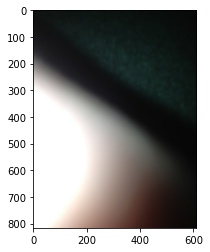

In [44]:
#change the path to test image
feedback('../../vizwiz/test/VizWiz_test_00000001.jpg', test_model, test_img)